In [12]:
import sys
sys.path.append('/Users/suying/Desktop/googlenewsNLP/Scripts')
from textclassfier import TextClassifier


In [13]:
import sys
print(sys.path)  # 打印Python解释器搜索模块的路径

import textclassfier  # 尝试导入模块
print(textclassfier.__file__)  # 查看模块的文件路径


['/Users/suying/Desktop/googlenewsNLP/Notebooks', '/Users/suying/.vscode/extensions/ms-toolsai.jupyter-2022.11.1003412109/pythonFiles', '/Users/suying/.vscode/extensions/ms-toolsai.jupyter-2022.11.1003412109/pythonFiles/lib/python', '/Users/suying/opt/anaconda3/lib/python39.zip', '/Users/suying/opt/anaconda3/lib/python3.9', '/Users/suying/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/suying/opt/anaconda3/lib/python3.9/site-packages', '/Users/suying/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/suying/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/Users/suying/.ipython', '/Users/suying/Desktop/googlenewsNLP/Scripts/textclassfier.py', '/Users/suying/Desktop/googlenewsNLP/Scripts/textclassfier.py', '/Users/suying/Desktop/googlenewsNLP/Scripts', '/Users/suying/Desktop/googlenewsNLP/Scripts', '/Users/suying/Desktop/googlenewsNLP/Scripts', '/Users/suying/Desktop/googlenewsNLP/Scripts']
/Users/suying/Desktop/googlenewsNLP/Scripts/textclassfier.py


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from textclassfier import TextClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.utils import class_weight

In [15]:
df = pd.read_csv('../data/clean_data.csv')

In [16]:
df.head()

,Title,Category
0,chainlink link falter hedera hbar wobbl yet vc...,Business
1,fund punish nvidia share stun 230 ralli,Business
2,crude oil price stall hedg fund sell kemp,Business
3,grayscal bitcoin win still half battl,Business
4,im home shop editor cantmiss labor day deal im...,Business


# Improve model
First, we want to try different models to get an overview of their results, and then understand which models we can use. We will cycle through 5 models with 2 different vectorizers and print classifications to find the model that works best

## CountVectorizer

In [17]:
X = df['Title']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à évaluer
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Linear_model": RidgeClassifier()
}

for name, model in models.items():
    print(f"Evaluating model: {name}\n" + "-" * 30)
    
    classifier = TextClassifier(model=model, vectorizer= CountVectorizer(max_features=5000, stop_words='english'))
    classifier.train(X_train, y_train)
    classifier.evaluate(X_test, y_test)
    
    print("\n\n")

Evaluating model: Logistic Regression
------------------------------


/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score:0.848866564614247
Accuracy: 0.8458239937627912
               precision    recall  f1-score   support

     Business       0.83      0.82      0.83      1380
Entertainment       0.89      0.89      0.89      1384
    Headlines       0.69      0.66      0.68      1420
       Health       0.90      0.91      0.90       943
      Science       0.92      0.90      0.91       902
       Sports       0.93      0.94      0.93      1592
   Technology       0.93      0.92      0.93      1351
    Worldwide       0.70      0.75      0.72      1289

     accuracy                           0.85     10261
    macro avg       0.85      0.85      0.85     10261
 weighted avg       0.85      0.85      0.85     10261




Evaluating model: Decision Tree
------------------------------
f1_score:0.7555559126364552
Accuracy: 0.7507065588149303
               precision    recall  f1-score   support

     Business       0.78      0.74      0.76      1380
Entertainment       0.79      0.79      0.79   

/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


f1_score:0.6216505572654168
Accuracy: 0.6098820777701979
               precision    recall  f1-score   support

     Business       0.47      0.65      0.54      1380
Entertainment       0.79      0.65      0.71      1384
    Headlines       0.47      0.43      0.45      1420
       Health       0.68      0.68      0.68       943
      Science       0.91      0.62      0.74       902
       Sports       0.50      0.75      0.60      1592
   Technology       0.80      0.68      0.74      1351
    Worldwide       0.66      0.41      0.51      1289

     accuracy                           0.61     10261
    macro avg       0.66      0.61      0.62     10261
 weighted avg       0.64      0.61      0.61     10261




Evaluating model: Naive Bayes
------------------------------
f1_score:0.8432736438891398
Accuracy: 0.8428028457265374
               precision    recall  f1-score   support

     Business       0.83      0.80      0.81      1380
Entertainment       0.87      0.88      0.87    

### Observation
According to the results. We can clearly say that in CountVectorizer, the precision of Linear_model and Logistic Regression are the best result. However, the actual improvement is still too small, and I will look at TF-IDF for all models next

## TF-IDF

In [18]:
X = df['Title']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à évaluer
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Linear_model": RidgeClassifier()
}


for name, model in models.items():
    print(f"Evaluating model: {name}\n" + "-" * 30)
    
    classifier = TextClassifier(model=model, vectorizer = TfidfVectorizer(max_features=5000, stop_words='english'))
    classifier.train(X_train, y_train)
    classifier.evaluate(X_test, y_test)
    
    print("\n\n")

Evaluating model: Logistic Regression
------------------------------


/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score:0.8495372179695886
Accuracy: 0.8472858395867849
               precision    recall  f1-score   support

     Business       0.83      0.82      0.82      1380
Entertainment       0.87      0.90      0.88      1384
    Headlines       0.72      0.67      0.69      1420
       Health       0.89      0.90      0.90       943
      Science       0.92      0.89      0.90       902
       Sports       0.92      0.94      0.93      1592
   Technology       0.93      0.91      0.92      1351
    Worldwide       0.72      0.77      0.75      1289

     accuracy                           0.85     10261
    macro avg       0.85      0.85      0.85     10261
 weighted avg       0.85      0.85      0.85     10261




Evaluating model: Decision Tree
------------------------------
f1_score:0.7506630617110668
Accuracy: 0.7441769808010915
               precision    recall  f1-score   support

     Business       0.76      0.73      0.74      1380
Entertainment       0.78      0.78      0.78  

/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


f1_score:0.5654985218510128
Accuracy: 0.5492642042685898
               precision    recall  f1-score   support

     Business       0.40      0.60      0.48      1380
Entertainment       0.87      0.61      0.71      1384
    Headlines       0.43      0.44      0.43      1420
       Health       0.65      0.56      0.60       943
      Science       0.96      0.55      0.70       902
       Sports       0.40      0.74      0.52      1592
   Technology       0.84      0.58      0.69      1351
    Worldwide       0.66      0.28      0.39      1289

     accuracy                           0.55     10261
    macro avg       0.65      0.54      0.57     10261
 weighted avg       0.63      0.55      0.56     10261




Evaluating model: Naive Bayes
------------------------------
f1_score:0.843961537769183
Accuracy: 0.8429977585030699
               precision    recall  f1-score   support

     Business       0.83      0.79      0.81      1380
Entertainment       0.87      0.89      0.88     

### Observation
According to the results. We can clearly say that in TF-IDF, the accuracy of logistic regression is the best result

Depending on the outcome of two different loops, we have two very close possibilities:
- Logistic regression with TFIDF
I'll focus on 

## Class_weight

In [19]:
X = df['Title']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = TextClassifier(model=LogisticRegression(max_iter=1000, class_weight='balanced'), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))
classifier.train(X_train, y_train)
classifier.evaluate(X_test, y_test)

f1_score:0.852593754767466
Accuracy: 0.8509891823409025
               precision    recall  f1-score   support

     Business       0.84      0.82      0.83      1380
Entertainment       0.87      0.89      0.88      1384
    Headlines       0.74      0.65      0.69      1420
       Health       0.88      0.92      0.90       943
      Science       0.88      0.93      0.91       902
       Sports       0.93      0.94      0.93      1592
   Technology       0.93      0.91      0.92      1351
    Worldwide       0.72      0.79      0.75      1289

     accuracy                           0.85     10261
    macro avg       0.85      0.86      0.85     10261
 weighted avg       0.85      0.85      0.85     10261



### Observation

After our first experiment, we can see that using class weights has a good effect on class 2 recalls. Even if the accuracy is reduced, it is still a good choice

## Param_grid

In [20]:
text_classifier = TextClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))

text_classifier.train(X_train, y_train)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'] 
}

grid_search = GridSearchCV(text_classifier.model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(text_classifier.X_train_tf, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

text_classifier.model = grid_search.best_estimator_
text_classifier.evaluate(X_test, y_test)

/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/suying/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", l

Best Parameters:  {'C': 1, 'penalty': 'l2'}
Best Accuracy:  0.846226948765642
f1_score:0.852593754767466
Accuracy: 0.8509891823409025
               precision    recall  f1-score   support

     Business       0.84      0.82      0.83      1380
Entertainment       0.87      0.89      0.88      1384
    Headlines       0.74      0.65      0.69      1420
       Health       0.88      0.92      0.90       943
      Science       0.88      0.93      0.91       902
       Sports       0.93      0.94      0.93      1592
   Technology       0.93      0.91      0.92      1351
    Worldwide       0.72      0.79      0.75      1289

     accuracy                           0.85     10261
    macro avg       0.85      0.86      0.85     10261
 weighted avg       0.85      0.85      0.85     10261



### Observation
From the results, it can be seen that the best result is the default result before, and there is no change in the result, so I will draw a learning curve to observe

## Learning Curve

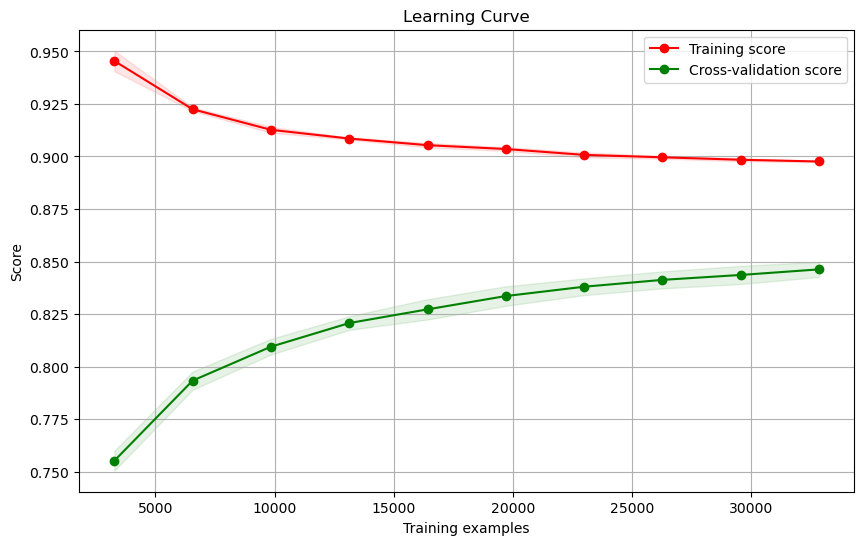

In [21]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(text_classifier.model, "Learning Curve", text_classifier.X_train_tf, y_train, cv=5)
plt.show()

In [22]:
text_classifier = TextClassifier(LogisticRegression(max_iter=5000, class_weight='balanced'), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))

text_classifier.train(X_train, y_train)

param_grid = {
    'C': [ 1],  
    'penalty': ['l2'] 
}

grid_search = GridSearchCV(text_classifier.model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(text_classifier.X_train_tf, y_train)


text_classifier.model = grid_search.best_estimator_
text_classifier.evaluate(X_test, y_test)

f1_score:0.852593754767466
Accuracy: 0.8509891823409025
               precision    recall  f1-score   support

     Business       0.84      0.82      0.83      1380
Entertainment       0.87      0.89      0.88      1384
    Headlines       0.74      0.65      0.69      1420
       Health       0.88      0.92      0.90       943
      Science       0.88      0.93      0.91       902
       Sports       0.93      0.94      0.93      1592
   Technology       0.93      0.91      0.92      1351
    Worldwide       0.72      0.79      0.75      1289

     accuracy                           0.85     10261
    macro avg       0.85      0.86      0.85     10261
 weighted avg       0.85      0.85      0.85     10261



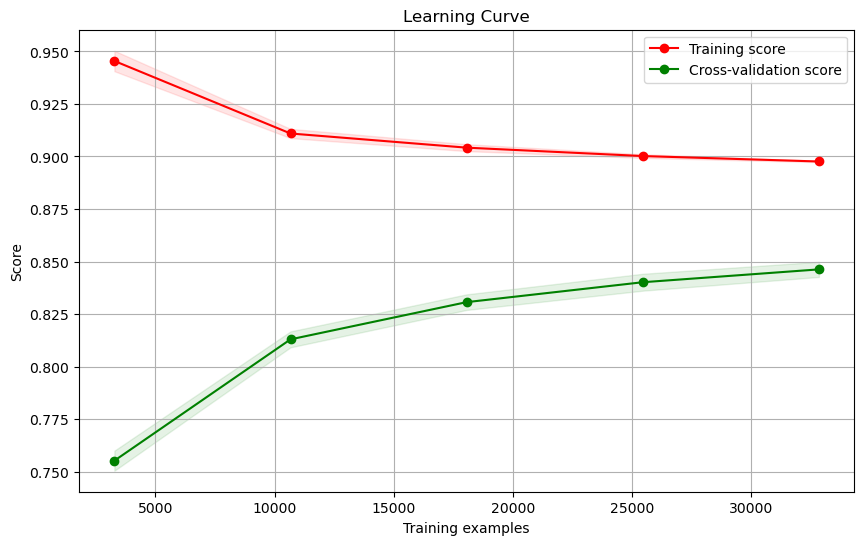

In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5,10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(text_classifier.model, "Learning Curve", text_classifier.X_train_tf, y_train, cv=5)
plt.show()

### Observation
The difference between these two curves is important. The results show that our model is obviously overfitting, and the amount of data reduces this problem. However, the improvement of the validation curve is very slow, and we can assume that the model can be improved by adding a lot of data, especially in class worldwide and headlines.